<a href="https://colab.research.google.com/github/rafaelachinaglia/pinguinsDataframe/blob/main/desafio_pinguins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align="right">  

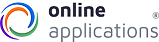


</div>

<div align="center">  

# **Desafio Pinguins - Programa de Estágio** 
</div>

## Sumário

1. Introdução

2. Resumo
    
3. Importando as bibliotecas

4. Importando os dados

5. Descrevendo os dados estatísticos

6. Análise de dados por espécie

    6.1 - Quantidade de pinguins por espécie

    6.2 - Quantidade de pinguins por sexo 

7. Análise de dados por ilha

    7.1 - Quantidade de pinguins por ilha

    7.2 - Quantidade de espécies por ilha

8. Análise de dados sobre o pinguim 

    8.1 - Profundidade da Crista X Tamanho da Crista

    8.2 - Massa corporal X Tamanho da Crista

    8.3 - Massa corporal X Nadadeira

9. Machine Learning

    9.1 - Aprendizado de Maquina 

    9.2 - Aprendizado com SVM 

10. Conclusão

11. Referências

##Introdução

   O Desafio Pinguins é um projeto de Data Science sucedido através do programa de estágio da empresa Online Applications onde efetuamos de uma trilha de conhecimentos básicos nas 3 principais trilhas da tecnologia (Front-end, Back-end e Data Science) e após finalizada, demonstramos em nossos projetos o conhecimento adquirido.


  Nesse desafio utilizamos o dataset *Palmer Penguins* que foi coletado pela dra Kristen Gorman na estação Palmer, Antartica. O dataset trás inúmeras informações sobre três espécies de pinguins: Adelie, Chinstrap e Gentoo como quais são suas características físicas e de onde vivem. 

## Resumo

A primeira etapa realizada foi importar os dados do Dataset para conhecê-los e entendê-los. Após isso, eles foram analisados e dividos em 3 principais vertentes: Dados por espécie, dados por ilha e dados do pinguim. E por último, foi utilizado o algoritmo SVM (*Support Vector Machine*) no *Machine Learning*.

## Importando as bibliotecas

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importações para o machine learning
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report, plot_confusion_matrix
import plotly.express as px


## Importando os dados

In [4]:
# Importando o dataset e o armazenando na variável dados
dados = pd.read_csv('penguins_size.csv')

## Alterando o nome das colunas com inplace (para manter o valor).
dados.rename(columns={'species': 'Especie',
                     'island': 'Ilha',
                     'culmen_length_mm':'Tamanho_crista_mm',
                     'culmen_depth_mm':'Profundidade_crista_mm',
                     'flipper_length_mm':'Nadadeira_mm',
                     'body_mass_g': 'Massa_corporal_g',
                     'sex':'Sexo'},inplace= True) 

# Removendo dados desnecessários de nossa tabela como, por exemplo, os dados NaN (Not A Number).
dados.dropna(axis=0, inplace=True)
dados = dados[dados['Sexo'] != '.']

# Comando que mostra um cabeçalho com os primeiros dez elementos
dados.head(10)

,Especie,Ilha,Tamanho_crista_mm,Profundidade_crista_mm,Nadadeira_mm,Massa_corporal_g,Sexo
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,FEMALE
13,Adelie,Torgersen,38.6,21.2,191.0,3800.0,MALE
14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,MALE


##Descrevendo os dados estatísticos sobre nosso Dataset

In [5]:
dados.describe()

,Tamanho_crista_mm,Profundidade_crista_mm,Nadadeira_mm,Massa_corporal_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


Aqui vemos um conjunto de estatísticas sobre nossos dados que informa a **quantidade total**, a **média**, o **desvio padrão**, o **valor mínimo**, os **quartis** e o **valor máximo**.

---

## Análise de dados por espécie

### Quantidade de pinguins por espécie

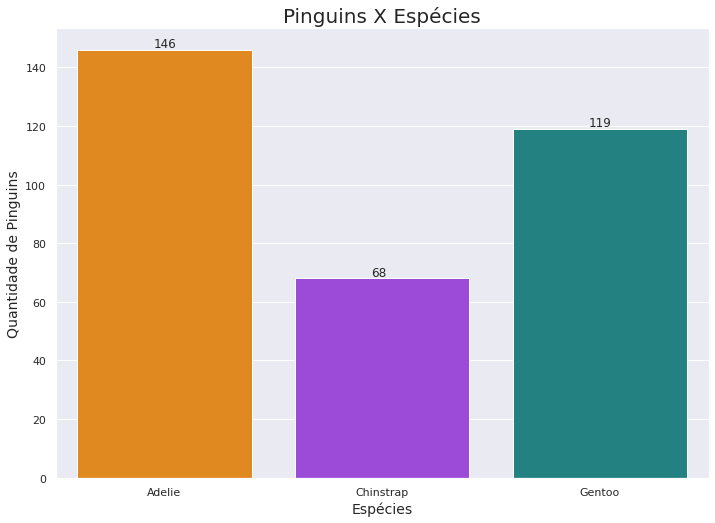

In [6]:
sns.set_style('whitegrid') # Muda o fundo do gráfico para branco
sns.set(rc={'figure.figsize':(11.7,8.27)}) #ajustando tamanho do gráfico
ax = sns.countplot(x=dados['Especie'], # Plota o gráfico
              palette=['#FF8C00','#A034F0','#159090']) # Altera as cores do gráfico
for p in ax.patches: ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.350, p.get_height()+0.9)) #Insere a quantidade nas colunas
plt.title("Pinguins X Espécies", size=20) # Coloca o titulo
ax.set_ylabel( "Quantidade de Pinguins" , size = 14) # Texto e tamanho da fonte do eixo y
ax.set_xlabel( "Espécies" , size = 14); # Texto e tamanho da fonte do eixo x

A raça **Adelie** é a que temos mais informação em nossos dados (43,84%), seguido pelo **Gentoo** (35,74%) e por fim o **Chinstrap** (20,42%)



---



### Quantidade de pinguins por sexo

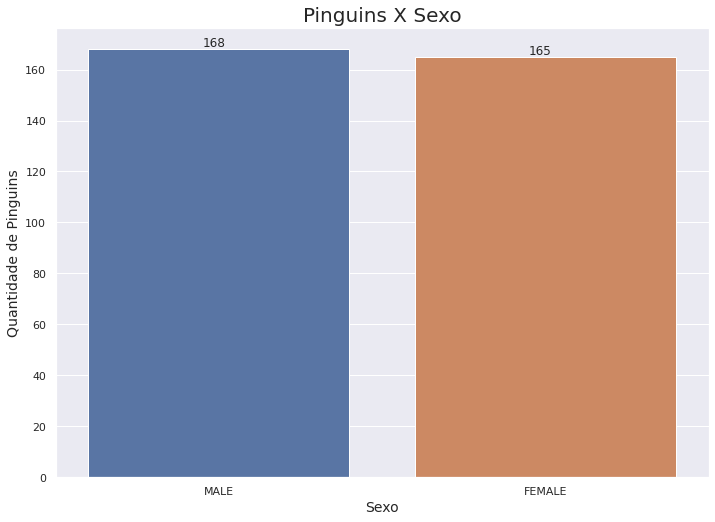

In [7]:
sns.set_style('whitegrid') # Muda o fundo do gráfico para branco
sns.set(rc={'figure.figsize':(11.7,8.27)}) # Ajustando tamanho do gráfico
ax = sns.countplot(x=dados['Sexo']) # Plota o gráfico
for p in ax.patches: ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.350, p.get_height()+0.9)) #Insere a quantidade nas colunas
plt.title("Pinguins X Sexo", size=20) # Coloca o titulo
ax.set_ylabel( "Quantidade de Pinguins" , size = 14) # Texto e tamanho da fonte do eixo y
ax.set_xlabel( "Sexo" , size = 14); # Texto e tamanho da fonte do eixo x

Aqui vemos que os sexos estão equilibrados em nossos dados sendo **50,45% do sexo masculino** e **49,55% do sexo feminino.**

---

## Análise de dados por ilha

### Quantidade de pinguins por ilha

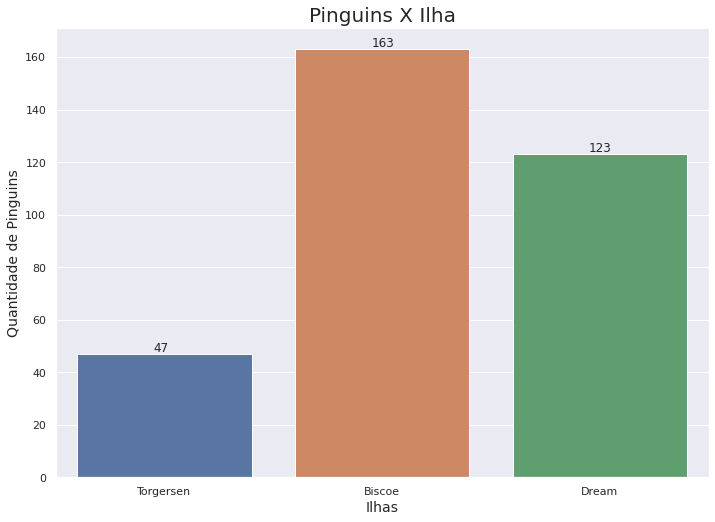

In [8]:
sns.set_style('whitegrid') # Muda o fundo do gráfico para branco
sns.set(rc={'figure.figsize':(11.7,8.27)}) #ajustando tamanho do gráfico
ax = sns.countplot(x=dados['Ilha']) # Plota o gráfico
for p in ax.patches: ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.350, p.get_height()+0.9)) #Insere a quantidade nas colunas
plt.title("Pinguins X Ilha", size=20)  # Coloca o titulo
ax.set_ylabel( "Quantidade de Pinguins" , size = 14) # Texto e tamanho da fonte do eixo y
ax.set_xlabel( "Ilhas" , size = 14); # Texto e tamanho da fonte do eixo x

Já nesse gráfico conseguimos ver a distribuição dos pinguins por localização e identificar que **a ilha Biscoe é a mais populosa**, seguido pela Dream e depois Torgersen.

---

### Quantidade de espécies por ilha

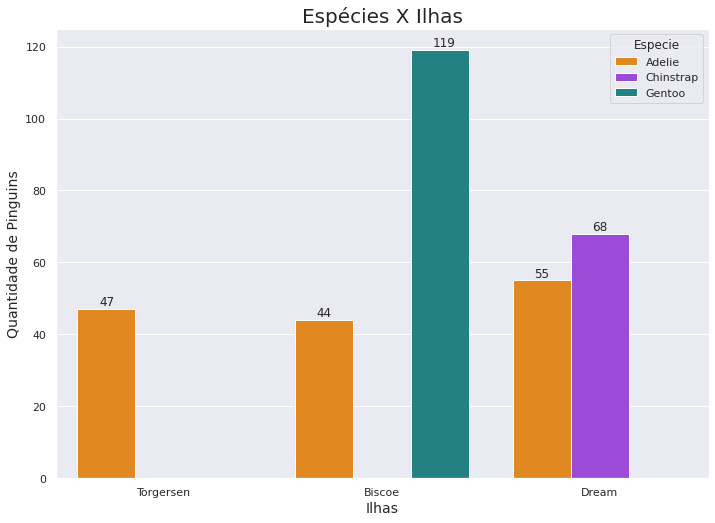

In [9]:
sns.set_style('whitegrid') # Muda o fundo do gráfico para branco
sns.set(rc={'figure.figsize':(11.7,8.27)}) #ajustando tamanho do gráfico
ax = sns.countplot(x=dados['Ilha'], hue=dados['Especie'], # Plota o gráfico
                      palette=['#FF8C00','#A034F0','#159090']) # Altera as cores do gráfico
for p in ax.patches: ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.9)) #Insere a quantidade nas colunas
plt.title("Espécies X Ilhas", size=20) # Coloca o titulo
ax.set_ylabel( "Quantidade de Pinguins" , size = 14) # Texto e tamanho da fonte do eixo y
ax.set_xlabel( "Ilhas" , size = 14); # Texto e tamanho da fonte do eixo x


Nessa análise vemos que, de acordo com nossos dados, podemos localizar **a espécie Adelie nas 3 ilhas**. Porém, a espécie **Gentoo só é encontrada na ilha Biscoe**. E por ultimo, **a especie Chinstrap foi localizada somente na ilha Dream.**

---

## Análise de dados sobre o pinguim

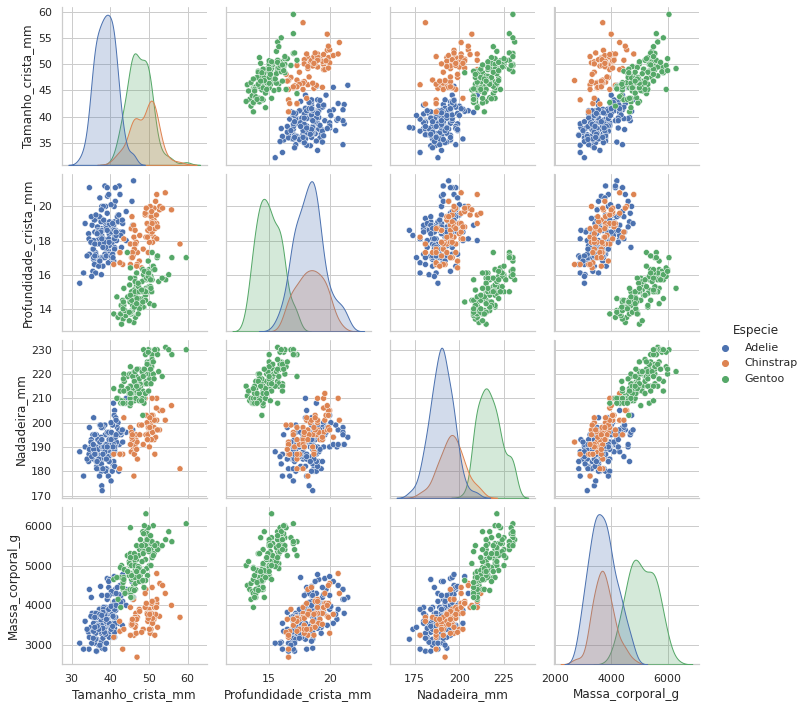

In [10]:
sns.set_style('whitegrid') # Muda o fundo do gráfico para branco
sns.pairplot(dados, hue="Especie"); # Plota o gráfico

---

### Profundidade da Crista x Tamanho da Crista

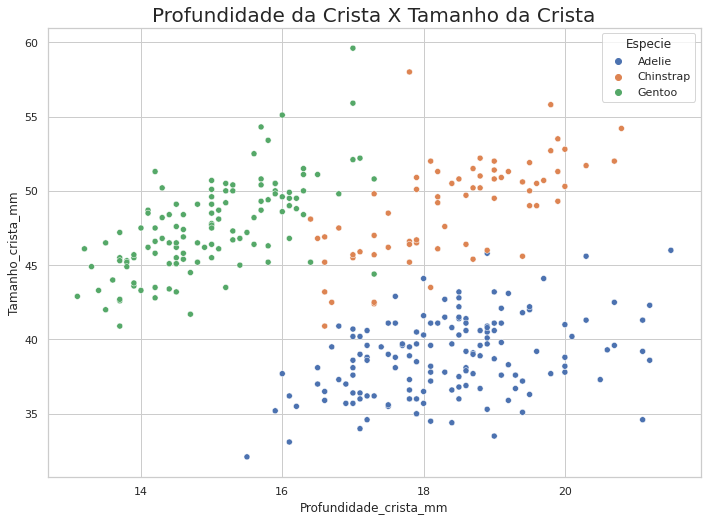

In [11]:
sns.set_style('whitegrid') # Muda o fundo do gráfico para branco
sns.scatterplot(x='Profundidade_crista_mm', y='Tamanho_crista_mm', hue='Especie', data=dados) # Plota o gráfico
plt.title("Profundidade da Crista X Tamanho da Crista", size=20) # Coloca o titulo
sns.set(rc={'figure.figsize':(11.7,8.27)}); # Ajustando tamanho do gráfico

Analisando a crista vemos que a do **Gentoo** é grande porém, **menos profunda que as dos outros.** No caso do **Chinstrap** é a maior e mais profunda. O Adelie possui a menor porém, profunda crista.

---

### Massa corporal x Tamanho da Crista

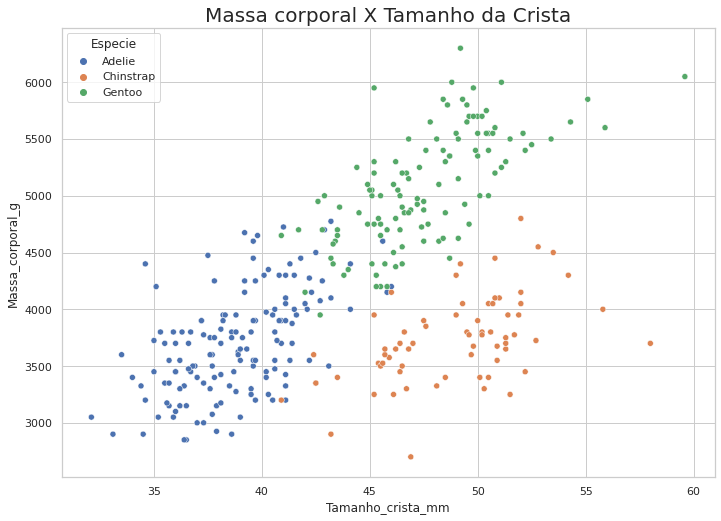

In [12]:
sns.set_style('whitegrid') # Muda o fundo do gráfico para branco
sns.scatterplot(x='Tamanho_crista_mm', y='Massa_corporal_g', hue='Especie', data=dados) # Plota o gráfico
plt.title("Massa corporal X Tamanho da Crista", size=20) # Coloca o titulo
sns.set(rc={'figure.figsize':(11.7,8.27)}); # Ajustando tamanho do gráfico

O **Gentoo** é o que possui uma maior massa corporal enquanto o **Chinstrap** é o que possui a maior crista. Já o **Adelie** é o que possui uma menor massa corporal e uma menor crista

---

### Massa corportal X Nadadeira

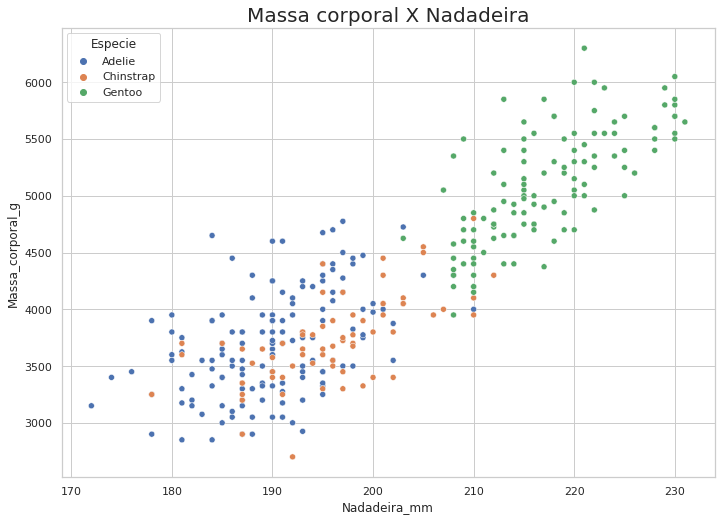

In [13]:
sns.set_style('whitegrid') # Muda o fundo do gráfico para branco
sns.scatterplot(x='Nadadeira_mm', y='Massa_corporal_g', hue='Especie', data=dados) # Plota o gráfico
plt.title("Massa corporal X Nadadeira", size=20) # Coloca o titulo
sns.set(rc={'figure.figsize':(11.7,8.27)}); #ajustando tamanho do gráfico

Aqui vemos que o **Gentoo** também tem uma nadadeira maior (em conjunto com sua massa corporal). E o **Adelie** e o **Chinstrap** possuem uma similaridade entre sua massa corporal e nadadeira (que são menores que o **Gentoo**).

---

##Machine Learning

O *Machine Learning* será aplicado com a intenção de prever a éspecie do pinguim e o modelo utilizado para tal será o SVM.

### Aprendizado de Máquina

In [14]:
#Treinando dados 
train, test = train_test_split(dados, test_size = 0.3, stratify=dados['Especie'])

train.shape, test.shape

((233, 7), (100, 7))

In [15]:
#Selecionando as colunas de treino e teste
train_X = train[['Tamanho_crista_mm','Profundidade_crista_mm','Nadadeira_mm','Massa_corporal_g']]
train_Y = train.Especie

test_x = test[['Tamanho_crista_mm','Profundidade_crista_mm','Nadadeira_mm','Massa_corporal_g']]
test_y = test.Especie

---

###Aprendizado com SVM

In [16]:
#Criando a variável para utlização do modelo
molde = svm.SVC()
molde.fit(train_X,train_Y)

SVC()

In [17]:
#Gerando rótulos com a predição
predicao = molde.predict(test_x)

In [18]:
#Descobrindo a acurácia
acuracia= accuracy_score(y_true=test_y, y_pred=predicao)
zero_division=1
print('A acurácia desse modelo é de:', acuracia * 100)

A acurácia desse modelo é de: 74.0


Para a acurácia ser assertiva ela dever o mais próximo de 100 possível. Nesse caso, a acurácia não foi tão alta.

In [19]:
#Visualização mais detalhada do resultado do modelo
print('A precisão do SVM é de:')
print(metrics.classification_report(test_y, predicao, zero_division=1))

A precisão do SVM é de:
              precision    recall  f1-score   support

      Adelie       0.66      0.95      0.78        44
   Chinstrap       1.00      0.00      0.00        20
      Gentoo       0.89      0.89      0.89        36

    accuracy                           0.74       100
   macro avg       0.85      0.61      0.56       100
weighted avg       0.81      0.74      0.66       100



### Matriz de confusão 

In [20]:
# Utilizando confusion_matrix
matrizDeConfusao=confusion_matrix(test_y,predicao);
print(matrizDeConfusao);

[[42  0  2]
 [18  0  2]
 [ 4  0 32]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


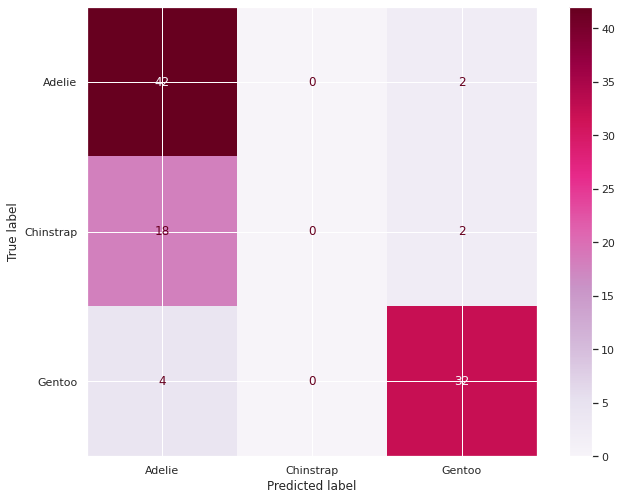

In [21]:
# Plotando a Matriz de Confusão
#fig = px.imshow(matrizDeConfusao, text_auto=True, title="Matriz de Confusão", color_continuous_scale='dense')
#fig.show()
plot_confusion_matrix(molde, test_x, test_y, cmap = 'PuRd');

Por meio da matriz de confusão, conseguimos observar que na **espécie Adelie** o modelo conseguiu prever 40 pinguins corretamente e 4 erroneamente. O caso da **espécie Chinstrap** foi o mais crítico pois ele não obteve nenhum acerto. Já na **espécie Gentoo** ele teve 30 acertos e 1 erro.

---

## Conclusão

   Foi muito interessante conhecer um pouco mais sobre os pinguins através desse *Dataset* e, após analisar as informações, tive o entendimento de algumas características: Foi coletado informações sobre **333 pinguins** sendo mais que a metade sobre a espécie **Adelie**. 

   Já em relação ao sexo, os dados estavam bem equilibrados sendo que 50,45% se tratavam do sexo masculino e 49,55% do sexo feminino.
   Reparando nas ilhas, **a Biscoe é a mais populosa** e podemos encontrar **somente os Gentoos lá**. O **Adelie** pode ser encontrado **nas três ilhas** e o **Chinstrap** só na  **ilha Dream**.
   
   Os dados também nos deram suporte para observar que a espécie **Gentoo** é o que possui a maior massa corporal e a maior nadadeira, enquanto o **Adelie** possui uma maior profundidade na crista. Entre as especies **Adelie** e **Chinstrap** a profundidade de crista é bem similiar mas a maior diferença fica entre o tamanho da crista que é maior no caso do **Chinstrap**.	

  Em relação ao *Machine Learning*, foi utilizado o modelo SVM para prever as espécies dos pinguins. Em minha visão, esse é modelo mais simples de se entender porém, sua simplicidade também pode ser um ponto negativo. O ideal é que a acurácia fique o mais próximo possível de 100 e como o número ficou abaixo disso ele não foi tão assertivo tendo em vista que as características dos Adelies e Chinstraps são muito similares.

## Referências

*   [Curso Alura - Data Science: analise e visualização de dados.](https://www.alura.com.br/curso-online-data-science-primeiros-passos)
*   [Curso Alura - Python Pandas: tratando e analisando dados](https://www.alura.com.br/curso-online-introducao-python-pandas)
*   [Video no Youtube - Support Vector Machine (SVM) in 2 minutes](https://www.youtube.com/watch?v=_YPScrckx28)
* [Video no Youtube - CLASSIFICAÇÃO com Máquinas de Vetores de Suporte (SVM) | Machine Learning #05](https://www.youtube.com/watch?v=ba7tMJZbGyA)

